# Project - Regression


In [1]:
# Step 1: Load the Dataset and Initial Exploration

In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/ashis/Downloads/regression_data.xls'

df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()

# Get basic information about the dataset
df.info()

# Summary statistics for numerical variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [3]:
# Step 2: Data Cleaning and Preprocessing
# We'll check for missing values, handle them, and preprocess the data for model training.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop rows with missing values (if any)
df = df.dropna()

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Feature engineering: Creating a new feature for year of sale
df['year_sold'] = df['date'].dt.year

# Dropping 'id' and 'date' columns as they won't be useful in the prediction
df = df.drop(columns=['id', 'date'])

# Encoding categorical variables
df = pd.get_dummies(df, columns=['waterfront', 'condition'])

# Checking the cleaned dataframe
df.head()

Missing values:
 id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,...,sqft_lot15,price,year_sold,waterfront_0,waterfront_1,condition_1,condition_2,condition_3,condition_4,condition_5
0,3,1.00,1180,5650,1.0,0,7,1180,0,1955,...,5650,221900,2014,1,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0,7,2170,400,1951,...,7639,538000,2014,1,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,0,6,770,0,1933,...,8062,180000,2015,1,0,0,0,1,0,0
3,4,3.00,1960,5000,1.0,0,7,1050,910,1965,...,5000,604000,2014,1,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,0,8,1680,0,1987,...,7503,510000,2015,1,0,0,0,1,0,0


In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Let's visualize the relationships between various features and the target variable (price).

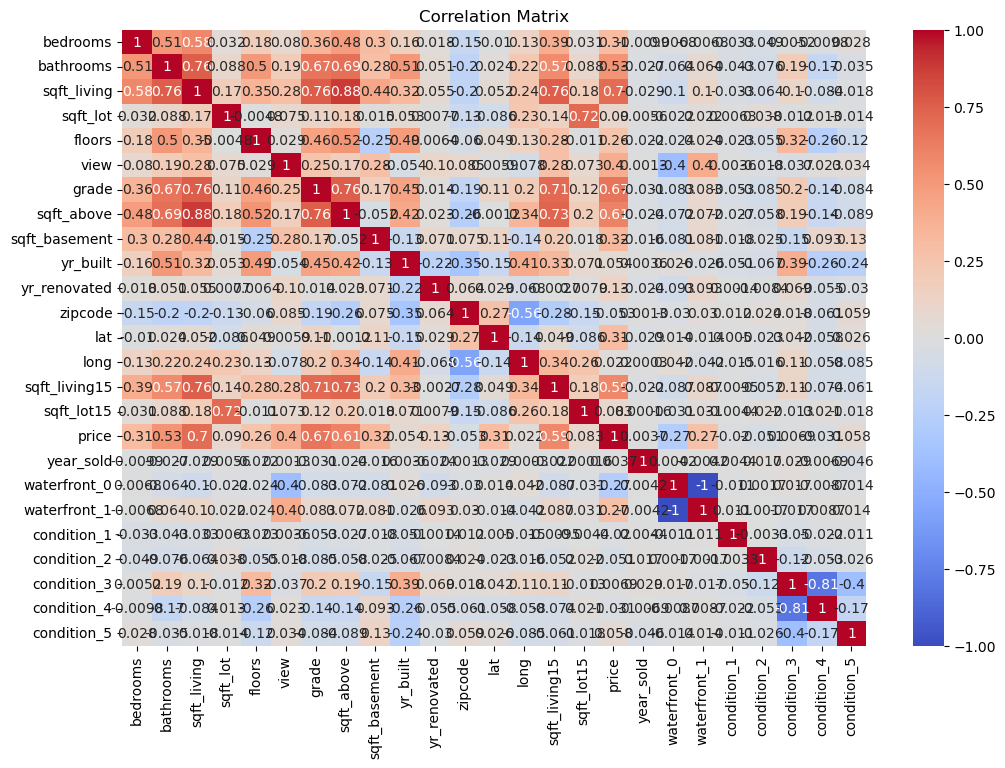

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



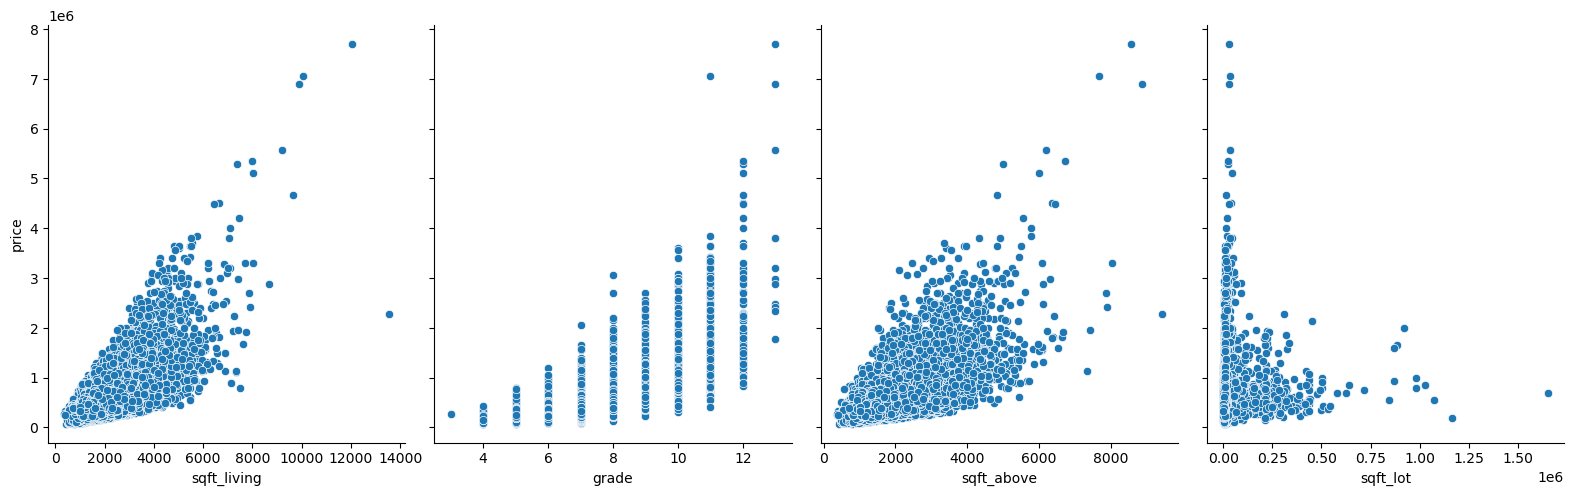

In [7]:
# Pairplot to visualize relationships
sns.pairplot(df, x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_lot'], y_vars='price',
height=5, aspect=0.8)
plt.show()

In [8]:
df.corr()['price'].sort_values()

waterfront_0    -0.266398
zipcode         -0.053402
condition_2     -0.051432
condition_4     -0.030759
condition_1     -0.019886
year_sold        0.003727
condition_3      0.006948
long             0.022036
yr_built         0.053953
condition_5      0.057531
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront_1     0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [9]:
# Step 4: Data Splitting and Model Building
# We'll split the data into training and testing sets and build a linear regression model.
# We'll also explore other models like KNN and Decision Trees.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the data into features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 125553.4972840312
Mean Squared Error (MSE): 39968401153.3543
Root Mean Squared Error (RMSE): 199920.9872758593
R-Squared (R2): 0.6930614119943657


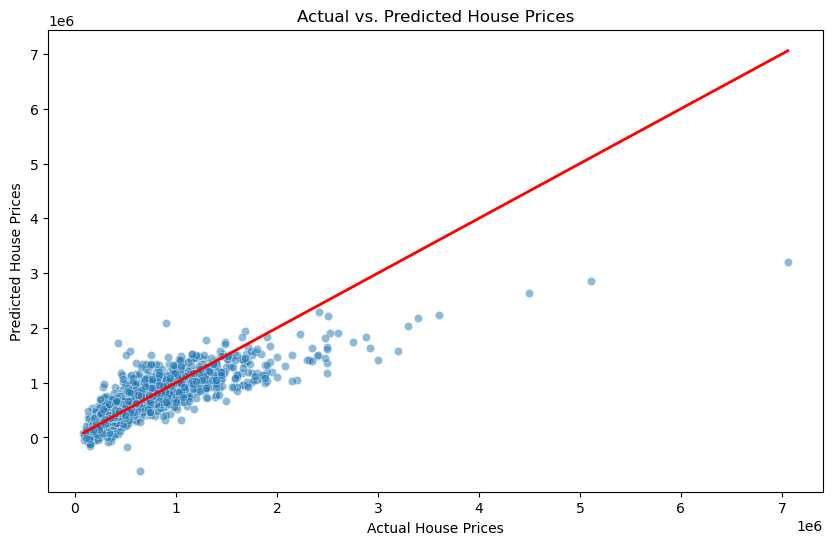

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the actual prices and y_pred contains the predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()


In [12]:
# Step 5: Comparing with Other Models
# You can compare the performance of Linear Regression with other models such as K-Nearest Neighbors (KNN) and Decision Trees.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# KNN Model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluate KNN Model
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = knn_mse ** 0.5
knn_r2 = r2_score(y_test, knn_pred)

# Evaluate Decision Tree Model
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = dt_mse ** 0.5
dt_r2 = r2_score(y_test, dt_pred)

print(f"\nK-Nearest Neighbors (KNN) Model Performance:")
print(f"MAE: {knn_mae}, MSE: {knn_mse}, RMSE: {knn_rmse}, R2: {knn_r2}")

print(f"\nDecision Tree Model Performance:")
print(f"MAE: {dt_mae}, MSE: {dt_mse}, RMSE: {dt_rmse}, R2: {dt_r2}")


K-Nearest Neighbors (KNN) Model Performance:
MAE: 93105.05532407407, MSE: 31183909985.38645, RMSE: 176589.66556791044, R2: 0.7605221869475247

Decision Tree Model Performance:
MAE: 94910.98807870371, MSE: 26551732332.74427, RMSE: 162947.02308647515, R2: 0.796095140257265


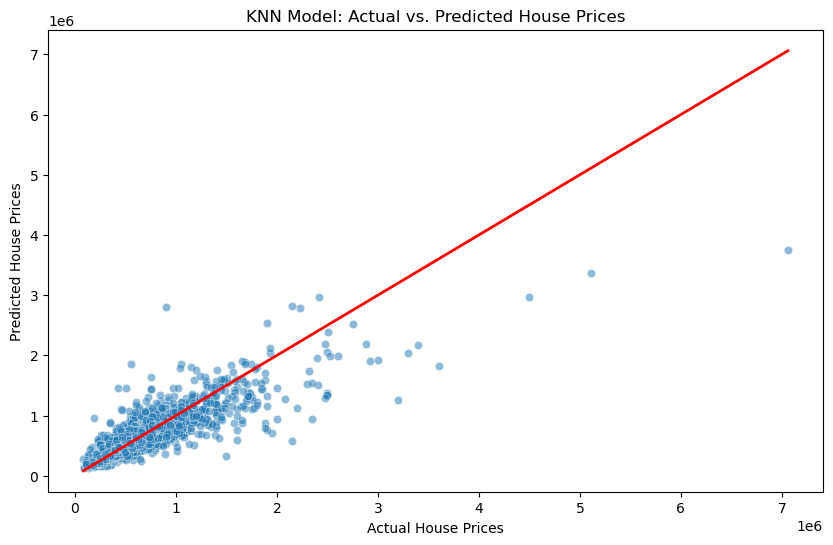

In [14]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the KNN model (use the same parameters as during training)
knn = KNeighborsRegressor(n_neighbors=5)  # Example with k=5

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)


import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('KNN Model: Actual vs. Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()


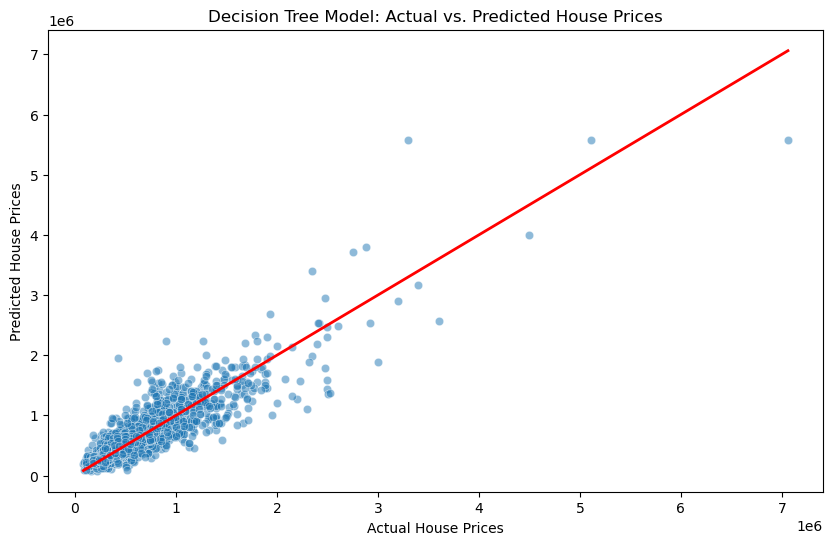

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Decision Tree model (use the same parameters as during training)
tree_model = DecisionTreeRegressor(random_state=42)  # Example with a random state for reproducibility

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)


import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs. Predicted Values for the Decision Tree model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('Decision Tree Model: Actual vs. Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()


In [16]:
## Linear Regression is a simple model that provides a good baseline but may not handle complex relationships in the data well.

## KNN improves upon Linear Regression by considering the local relationships between data points, leading to better predictions

## Decision Tree performs the best because it captures non-linear relationships and interactions between variables, 
# leading to the most accurate predictions in this case.


# By choosing the Decision Tree model, we have opting for the most accurate and effective model for predicting house prices  
# in this project. This decision guides the next steps in the project, from making predictions and documenting the model's 
# strengths to potentially deploying it for real-world use.